# Homework 2

In [1]:
import numpy as np
from numpy import random as rand
import matplotlib.pyplot  as plt

### Question 1

In [2]:
v1=0
vmin=0
vrand=0
v1dist=np.zeros((100000,1))
vmindist=np.zeros((100000,1))
vranddist=np.zeros((100000,1))
for k in range(100000):
    
    c1=[]
    cmin=[]
    crand=[]
    current=[]
    randomno=rand.randint(0,1000,size=1)
    for i in range(1000):
        current=rand.randint(0,2,size=10)
        if i==0:
            c1=current
        if i==randomno:
            crand=current
        
        if len(cmin)==0:
            cmin=current
        else:
            if np.count_nonzero(current)<np.count_nonzero(cmin):
                cmin=current
    vmindist[k]=(np.count_nonzero(cmin)/10)
    v1dist[k]=(np.count_nonzero(c1)/10)
    vranddist[k]=(np.count_nonzero(crand)/10)
   # c1dist[k]=c1
    #cmindist[k]=cmin
    #cranddist[k]=crand
    if k%10000==0: print(k)

        

0
10000
20000
30000
40000
50000
60000
70000
80000
90000


In [3]:
print(np.mean(vmindist))

0.037498


### Question 2

V1 and Vrand are virtually overlapping in the plot below

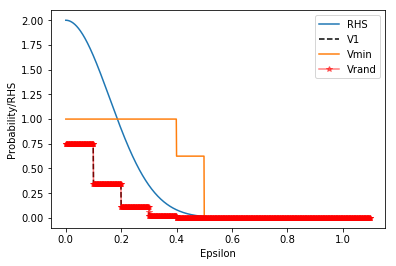

In [4]:
%matplotlib inline
mu=0.5
N=10
epsilon=np.arange(0,1.1,0.001)
length=len(epsilon)
right=2*np.exp(-2*(epsilon)**2*N)
vrandplotdata=np.zeros((length,1))
vminplotdata=np.zeros((length,1))
v1plotdata=np.zeros((length,1))
for i in range(length):
    probv1=abs(v1dist-mu)>epsilon[i]
    v1plotdata[i]=np.mean(probv1)
    probvmin=abs(vmindist-mu)>epsilon[i]
    vminplotdata[i]=np.mean(probvmin)
    probvrand=abs(vranddist-mu)>epsilon[i]
    vrandplotdata[i]=np.mean(probvrand)
plt.plot(epsilon,right,label="RHS")
plt.plot(epsilon,v1plotdata,label="V1",linestyle="--",alpha=3,color="black")
plt.plot(epsilon,vminplotdata,label="Vmin")
plt.plot(epsilon,vrandplotdata,label="Vrand",color="red",marker="*",alpha=0.5)
plt.legend()
plt.xlabel("Epsilon")
plt.ylabel("Probability/RHS")
plt.show()


### Question 5

In [5]:
def dataset(n):
    testset=np.zeros((n,3))
    for i in range(n):
        testset[i,0]=1
        testset[i,1]=rand.uniform(-1,1)
        testset[i,2] =rand.uniform(-1,1)
    return testset
    

In [6]:
def predict(data,weights):
    features=data
    predicted_y=np.dot(features,weights)
    predicted=np.sign(predicted_y)
    return predicted

In [7]:
def trainingweights():
    
    x1=rand.uniform(0,1,size=1)
    y1=rand.uniform(0,1,size=1)
    x2=rand.uniform(-1,0,size=1)
    y2=rand.uniform(-1,0,size=1)
    x=np.array([x1,x2])
    y=np.array([y1,y2])
    m,b=np.polyfit(x.flatten(),y.flatten(),1)
    w0=(m*x2)-y2
    w1=-m
    w2=1
    actual_weights=np.zeros((3,1))
    actual_weights[0:3,0:1]=np.array([w0,w1,w2]).reshape((3,1))
    return actual_weights

In [8]:
def train(n):
    weights=trainingweights()
    actual_weights=weights
    features=dataset(n)
    actual_y=predict(features,weights)
    xtx=np.dot(features.T,features)
    xtxinv=np.linalg.pinv(xtx)
    xtxinvxt=np.dot(xtxinv,features.T)
    xtxinvxty=np.dot(xtxinvxt,actual_y)
    predicted_weights=xtxinvxty
    return actual_weights,features,actual_y,predicted_weights

In [9]:
def run_linear_regression(n):
    actual_weights,features,actual_y,predicted_weights=train(n)
    predicted_y=predict(features,predicted_weights)
    errors=np.mean(actual_y!=predicted_y)
    
    return errors

In [10]:
errors=np.zeros((1000))
for i in range(1000):
    errors[i]=run_linear_regression(100)
mean_error=np.mean(errors)
print(mean_error)

0.02843


### Question 6

In [11]:
sm=0
n=1000
#Train using N=100, just like in Question 5.  So this basically will replicate the Q 5 expriment.
for i in range(1000):
    actual_weights,features,initial_y,predicted_weights=train(100)    
    #Generate a newdataset that the training algorithm has not seen yet
    newdataset=dataset(n)
    #Calculate the actual target using actual weights
    actual_y=predict(newdataset,actual_weights)
    #Calculate predicted target
    predicted_y=predict(newdataset,predicted_weights)
    
    sm=sm+(np.mean(actual_y!=predicted_y))
print(sm/1000)

0.037289


### Question 7

In [12]:
def train_perceptron(data,actual_y,actual_weights,initial_weights, n):
    features=data
    predicted_y=np.zeros((n,1))
    ct=0
    size=n
    mismatch=[x for x in range(n) if actual_y[x]!=predicted_y[x]]
    while(size>0 and ct<1000):
        m=rand.choice(mismatch)
        initial_weights=initial_weights.T
        initial_weights=initial_weights+actual_y[m]*features[m]
        initial_weights=initial_weights.T
        predicted_y=np.sign(np.dot(features,initial_weights))
        mismatch=[x for x in range(n) if actual_y[x]!=predicted_y[x]]
        size=len(mismatch)
        ct=ct+1

            
    final_weights=initial_weights
    return final_weights,ct

In [13]:
sm=0
counter=0
while counter<1000:
    n=10
    actual_weights,features,actual_y,predicted_weights=train(n)
    #errors=np.mean(actual_y!=predicted_y)
    final_weights,ct=train_perceptron(features,actual_y,actual_weights,predicted_weights,n)
    if ct>=100: continue
    
    sm=sm+ct
    counter+=1

print(sm/1000)

6.108


### Question 8

In [14]:
def predict_2(data,weights):
    features=data**2
    predicted_y=np.dot(features,weights)
    predicted=np.sign(predicted_y)
    return predicted

In [15]:
def train_2(n):
    weights=np.array([-0.6,1,1])
    weights=weights.reshape(3,1)
    actual_weights=weights
    features=dataset(n)
    actual_y=predict_2(features,weights)
    noise_fraction=int(n/10)
    random_noise=rand.choice(n,replace=False,size=noise_fraction)
    for i in random_noise:
        actual_y[i]=actual_y[i]*-1
    
    
    xtx=np.dot(features.T,features)
    xtxinv=np.linalg.pinv(xtx)
    xtxinvxt=np.dot(xtxinv,features.T)
    xtxinvxty=np.dot(xtxinvxt,actual_y)
    predicted_weights=xtxinvxty
    return actual_weights,features,actual_y,predicted_weights

In [16]:
def run_linear_regression_2(n):
    actual_weights,features,actual_y,predicted_weights=train_2(n)
    predicted_y=predict(features,predicted_weights)
    errors=np.mean(actual_y!=predicted_y)
    
    return errors

In [17]:
errors=np.zeros((1000))
for i in range(1000):
    errors[i]=run_linear_regression_2(1000)
mean_error=np.mean(errors)
print(mean_error)

0.50337


###  Question 9

In [18]:
def train_3(n):
    features=dataset(n)
    weights=np.array([-0.6,1,1])
    weights=weights.reshape(3,1)
    actual_weights=weights
    noise_fraction=int(n/10)
    actual_y=predict_2(features,weights)

    random_noise=rand.choice(n,replace=False,size=noise_fraction)
    for i in random_noise:
        actual_y[i]=actual_y[i]*-1
    
    features=np.append(features,(features[:,1]*features[:,2]).reshape(len(features),1),axis=1)
    features=np.append(features,(features[:,1]*features[:,1]).reshape(len(features),1),axis=1)
    features=np.append(features,(features[:,2]*features[:,2]).reshape(len(features),1),axis=1)
    xtx=np.dot(features.T,features)
    xtxinv=np.linalg.pinv(xtx)
    xtxinvxt=np.dot(xtxinv,features.T)
    xtxinvxty=np.dot(xtxinvxt,actual_y)
    predicted_weights=xtxinvxty
    return features,predicted_weights

In [19]:
sm=np.zeros((6,1))
for i in range(100):
    features,weights=train_3(1000)
    sm+=weights
sm=sm/100
print(sm)

[[ -9.91331904e-01]
 [  6.67539081e-05]
 [  6.14841535e-03]
 [  3.52738184e-03]
 [  1.55400083e+00]
 [  1.55829982e+00]]


The answer is the choice where the last two weights are closest to 1.5

### Question 10

In [20]:
sm=0
for i in range(1000):   
    features,predicted_weights=train_3(1000)
    actual_weights=np.array([-0.6,1,1])
    actual_weights=actual_weights.reshape(3,1)
    n=1000
    features=dataset(n)
    actual_y=predict_2(features,actual_weights) 
    features=np.append(features,(features[:,1]*features[:,2]).reshape(len(features),1),axis=1)
    features=np.append(features,(features[:,1]*features[:,1]).reshape(len(features),1),axis=1)
    features=np.append(features,(features[:,2]*features[:,2]).reshape(len(features),1),axis=1)
    noise_fraction=int(n/10)
    random_noise=rand.choice(n,replace=False,size=noise_fraction)
    for i in random_noise:
        actual_y[i]=actual_y[i]*-1
    predict_y=np.dot(features,predicted_weights)
    predict_y=np.sign(predict_y)
    sm=sm+(np.mean(actual_y!=predict_y))
print(sm/1000)

0.125889
